<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 7: <i>Introduction to single cell gene expression analysis</i></h3>
    <h4>Deadline: 5:30PM, December 13th, 2023</h4>
    <h4>Total Points: 300</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Please folow the following guidelines:</h2>
    <p>1. You can use PACE RStudio for this project, but please bring this analysis code to the jupyter notebook for submission. (Write your R code in the cells of this notebook with appropriate comments).</p>
    <p>2. Figures are the most important aspect of this project, so please download (from PACE RStudio) and show you result figures in this jupyter notebook using markdown.</p>
    <p>3. This project will focus on a simple analysis of a single cell gene expression dataset. The sections are divided broadly, so please explain your work in as much detail as possible.</p>
</div>

---

# **1. Reading the data**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>1. Locate and read the data</h3>
    <p>We have raw data files in: /storage/ice-shared/biol6150/Data/SingleCell/ProjectDataset/. Read this data using Seurat and get ready for QC</p> 
</div>

### Add cells for R code, comments and figures (using markdown) to keep in mind.

#. Load the dataset

pbmc.data <- Read10X_h5(filename = "/home/hice1/cwijeyesekera3/biol6150/Data/SingleCell/ProjectDataset/10k_PBMC_3p_nextgem_Chromium_X_intron_raw_feature_bc_matrix.h5", use.names = TRUE, unique.features = TRUE)

#. Initialize the Seurat object

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc10k", min.cells = 3, min.features = 200)

# **2. Quality control**
### *Total Questions: 1*
### *Total Points: 100*


---

<div class="alert alert-block alert-warning">
    <h3>2. QC and normalization</h3>
    <p>Perform QC, normalization and feature selection on this dataset. Show your feature selection scatter plot in this notebook (and any other figures you create along the way)</p>
</div>

### Add cells for R code, comments and figures (using markdown) to keep in mind.


VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")

plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

plot1 + plot2

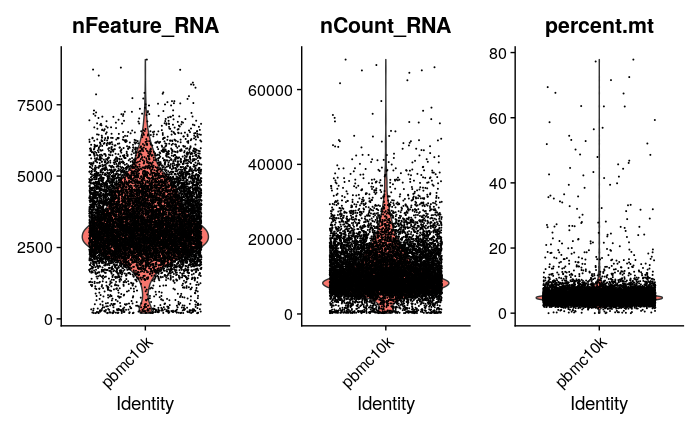

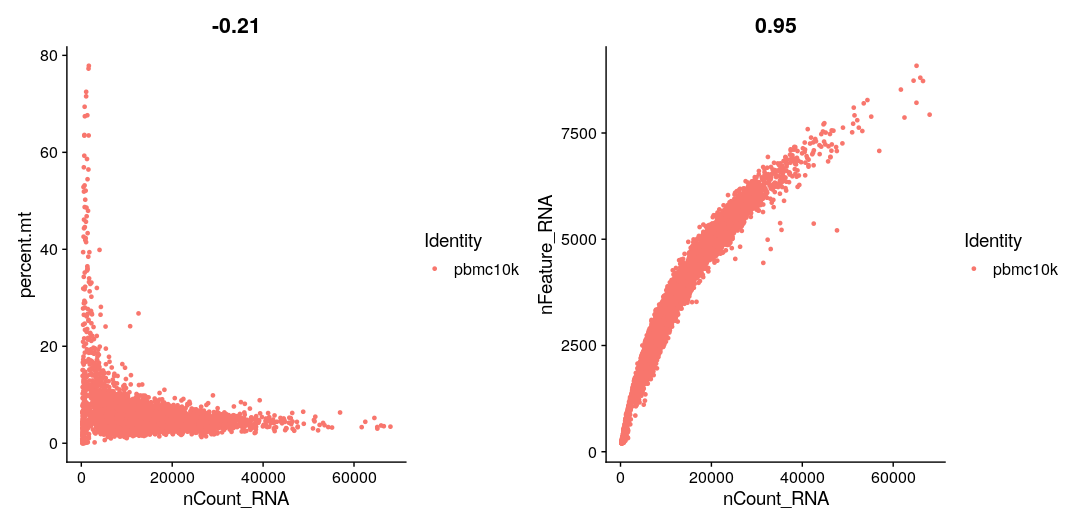

#. Subset data based on appropriate QC metrics (10% MT and 200-7500 nFeatures)

pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 10)

#. Normalize Data using standard parameters (LogNormalize and scale factor of 10,000)

pbmc <- NormalizeData(pbmc)

### After QC
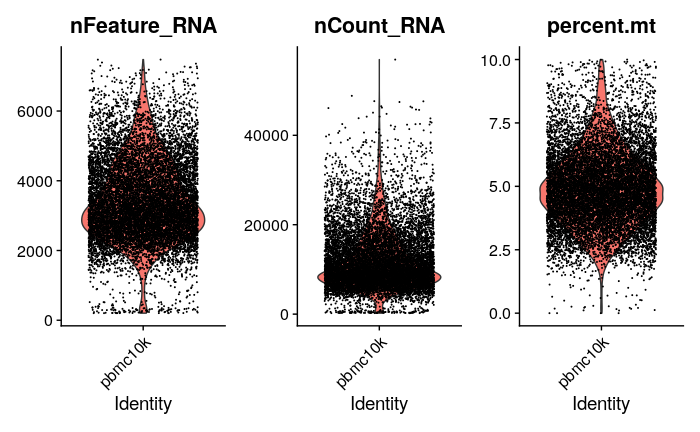

# **3. Dimensionality reduction and clustering**
### *Total Questions: 2*
### *Total Points:  50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Can you see any clusters in your data?</h3>
    <p>1. Plot your PCA</p>
    <p>1. Plot your UMAP</p>
</div>

### Add cells for R code, comments and figures (using markdown) to keep in mind.

#. Run PCA

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

#. Plot PCA

DimPlot(pbmc, reduction = "pca") + NoLegend()


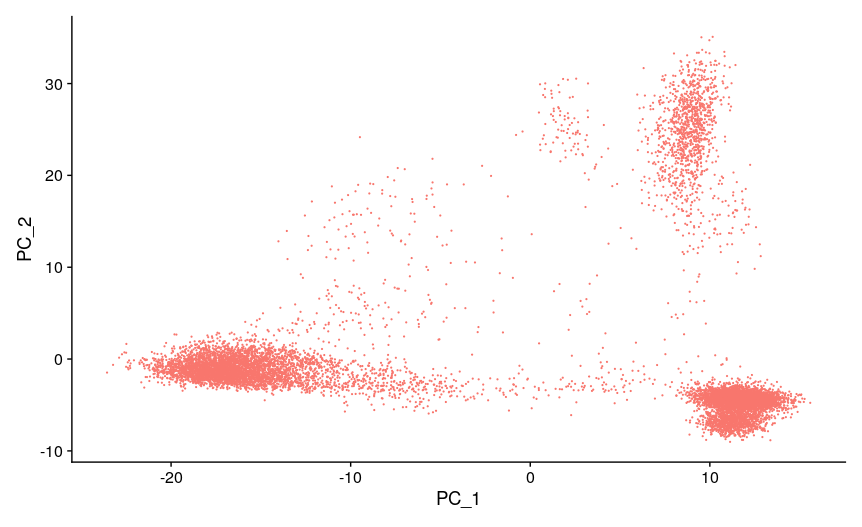

#. Run initial umap on data

pbmc <- RunUMAP(pbmc, dims = 1:10)

DimPlot(pbmc, reduction = "umap")

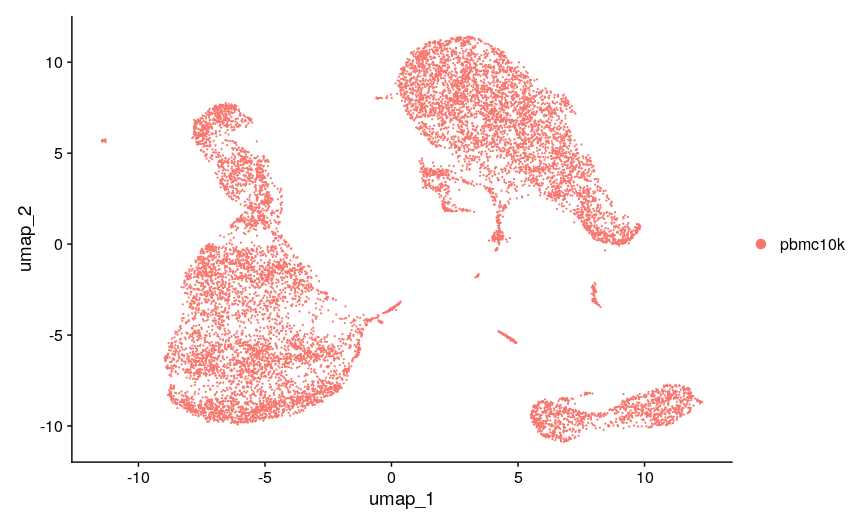

<div class="alert alert-block alert-warning">
    <h3>3.2 Perform clustering of cells using graph based clustering approach as implemented in Seurat's tutorial.</h3>
    <p>1. Plot your PCA (show clusters this time)</p>
    <p>1. Plot your UMAP (show clusters this time)</p>
</div>

### Add cells for R code, comments and figures (using markdown) to keep in mind.

#. Clustering using a graph based approach: KNN-graph.

pbmc <- FindNeighbors(pbmc, dims = 1:10)

pbmc <- FindClusters(pbmc, resolution = 0.5)

#.Replot PCA

DimPlot(pbmc, reduction = "pca") + NoLegend()

#. Rerun uMAP using graph based approach

pbmc <- RunUMAP(pbmc, dims = 1:10)

DimPlot(pbmc, reduction = "umap")

### PCA Plot
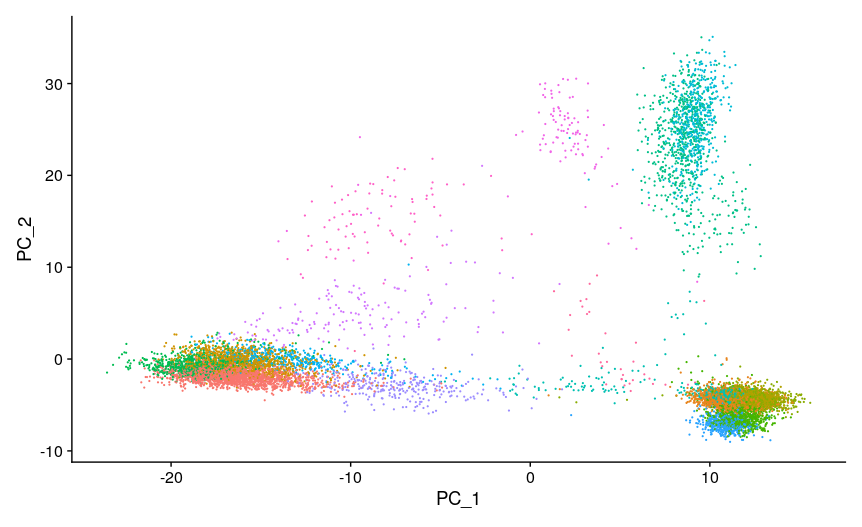

### Umap
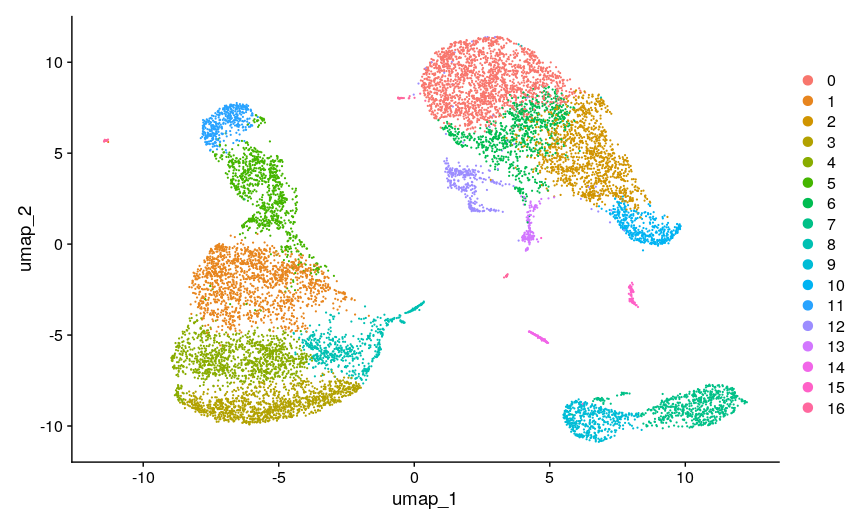

# **4. Identify specific genes**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>4. Identify highly variable genes</h3>
    <p>For these highly variable genes (select 3-4 genes), investigate if gene expression values are variable between identified clusters (plot (RStudio) and show violin plots here) </p>
</div>

### Add cells for R code, comments and figures (using markdown) to keep in mind.

#. Find Variable Features using vst method and return 2000 features

pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

#. Identify the 10 most highly variable genes

top10 <- head(VariableFeatures(pbmc), 10)

plot1 <- VariableFeaturePlot(pbmc)

plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

plot2

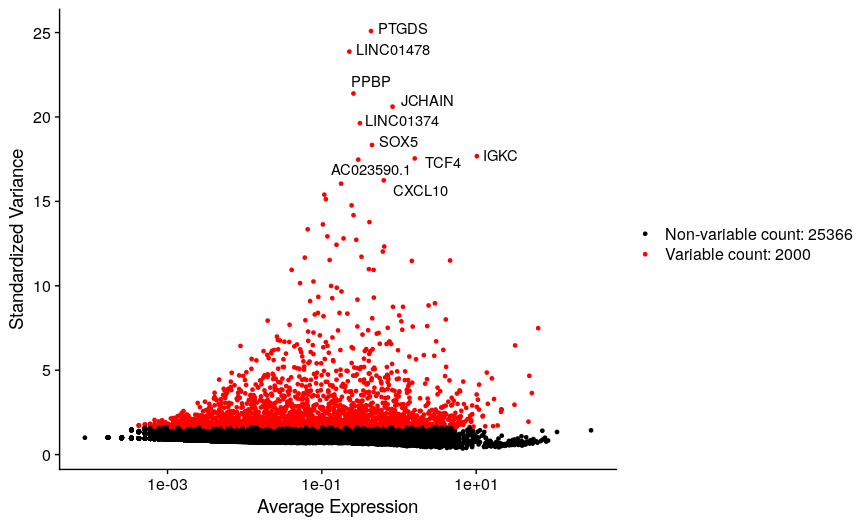

#. Plots top 3 variable features by cluster. Three individual graphs were used due to the high number of clusters

VlnPlot(pbmc, features = c("PTGDS"), layer = "counts", log = TRUE)

VlnPlot(pbmc, features = c("LINC01478"), layer = "counts", log = TRUE)

VlnPlot(pbmc, features = c("PPBP"), layer = "counts", log = TRUE)

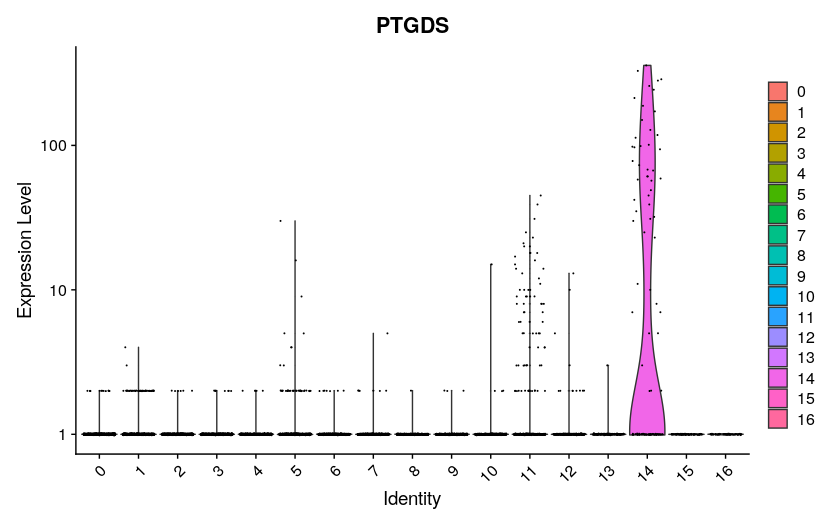

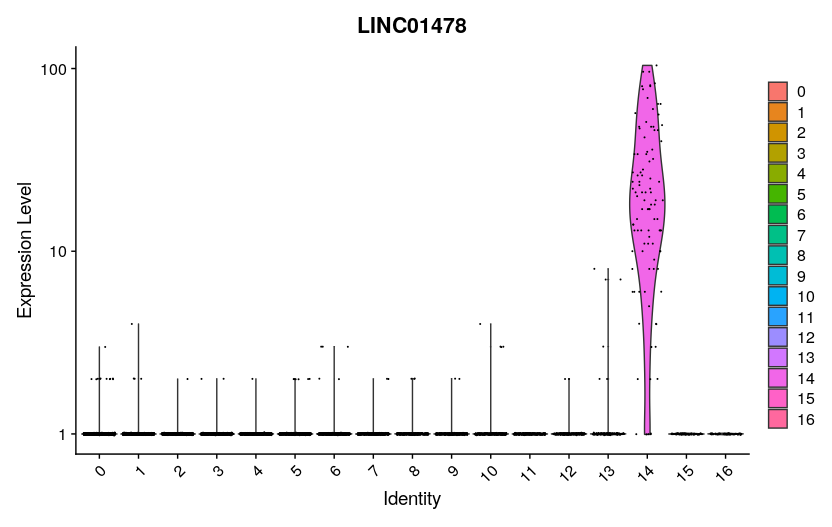

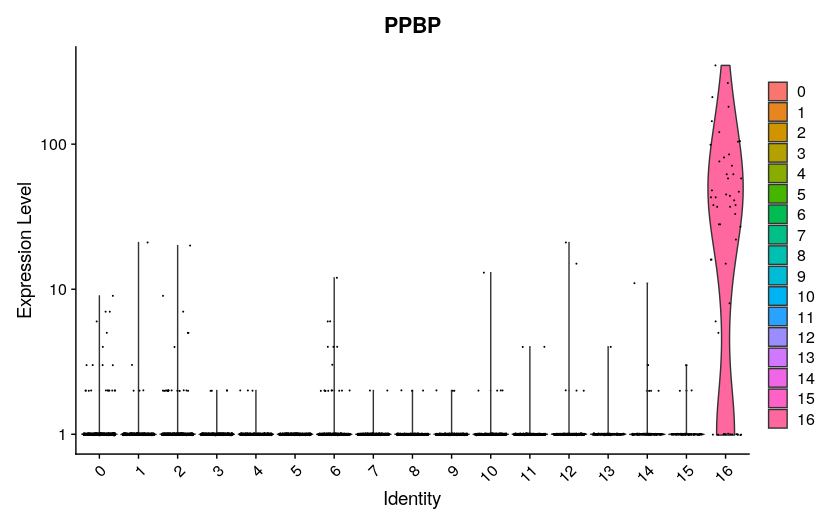